# About this Notebook

this notebook does the following...
- Reads Rice Data
- Reshapes Rice Data
- Matches Date Format with Climate Data
- Plot historical Rice data
- Outputs `riceipynb_output.csv`|

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Changing the table's structure

The CSV dataset from PSA DATABASE (`./RiceData/RiceData.csv`) is corrupted (The csv just does not work and had to be separated) <br>
This was done automatically using excel, and `./RiceData/RiceData_fixed.csv` is saved

In [2]:
# Read Data and Skip top 2 rows
df = pd.read_csv('./RiceData/RiceData_fixed.csv', header=2) 
df.head()


,Ecosystem/Croptype,Geolocation,2013 Quarter 1,2013 Quarter 2,2013 Quarter 3,2013 Quarter 4,2014 Quarter 1,2014 Quarter 2,2014 Quarter 3,2014 Quarter 4,...,2020 Quarter 3,2020 Quarter 4,2021 Quarter 1,2021 Quarter 2,2021 Quarter 3,2021 Quarter 4,2022 Quarter 1,2022 Quarter 2,2022 Quarter 3,2022 Quarter 4
0,Irrigated Palay,..CORDILLERA ADMINISTRATIVE REGION (CAR),53933,133461.00,59099.0,148178,56330.00,135781.0,56933.00,140688.00,...,86947.66,90826.74,34528.78,110046.21,61484.82,111118.45,27974.61,105528.27,49979.00,105080.28
1,Irrigated Palay,..REGION I (ILOCOS REGION),304800,124165.00,102304.0,738768,314274.00,142898.0,107841.00,740451.00,...,161482.00,729834.00,321291.00,186987.60,149625.00,721837.00,323889.00,182757.27,162454.00,735974.57
2,Irrigated Palay,..REGION II (CAGAYAN VALLEY),636359,505349.43,326952.0,756561,519271.95,655432.2,355248.65,780344.35,...,331399.00,835265.00,562062.62,884539.92,387499.99,846556.00,558584.56,881521.40,420627.14,829067.72
3,Irrigated Palay,..REGION III (CENTRAL LUZON),664331,1020117.00,276952.0,1132362,706483.00,1140807.0,199628.00,1376135.00,...,322867.81,1337142.73,695626.50,1033118.07,377226.39,1449292.27,768658.28,1133641.14,312055.73,1282095.90
4,Rainfed Palay,..CORDILLERA ADMINISTRATIVE REGION (CAR),2336,3357.00,12037.0,47769,2512.00,3404.0,9549.00,47412.00,...,8207.60,46829.11,585.64,2868.70,5954.83,50545.92,885.52,3577.74,8293.39,36748.65


In [3]:
# Pivot Year and Quarter columns to rows
melted_df = pd.melt(df, id_vars=['Ecosystem/Croptype', 'Geolocation'], var_name='Quarter_Year', value_name='Rice Production (MT)')

melted_df[['Year', 'Quarter']] = melted_df['Quarter_Year'].str.split(' Quarter ', expand=True) # Spliting Quarter_Year to Year and Quarter

melted_df.drop('Quarter_Year', axis=1, inplace=True) # Drop the split column Quarter_Year

melted_df.head()

,Ecosystem/Croptype,Geolocation,Rice Production (MT),Year,Quarter
0,Irrigated Palay,..CORDILLERA ADMINISTRATIVE REGION (CAR),53933.0,2013,1
1,Irrigated Palay,..REGION I (ILOCOS REGION),304800.0,2013,1
2,Irrigated Palay,..REGION II (CAGAYAN VALLEY),636359.0,2013,1
3,Irrigated Palay,..REGION III (CENTRAL LUZON),664331.0,2013,1
4,Rainfed Palay,..CORDILLERA ADMINISTRATIVE REGION (CAR),2336.0,2013,1


In [4]:
# Convert Year and Quarter to datetime
melted_df['Date'] = pd.to_datetime(melted_df['Year'].astype(str) + 'Q' + melted_df['Quarter'].astype(str)) + pd.offsets.QuarterEnd()
melted_df.drop(['Year', 'Quarter'], axis=1, inplace=True)

melted_df.head()

C:\Users\Potato\AppData\Local\Temp\ipykernel_6740\982946976.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  melted_df['Date'] = pd.to_datetime(melted_df['Year'].astype(str) + 'Q' + melted_df['Quarter'].astype(str)) + pd.offsets.QuarterEnd()


,Ecosystem/Croptype,Geolocation,Rice Production (MT),Date
0,Irrigated Palay,..CORDILLERA ADMINISTRATIVE REGION (CAR),53933.0,2013-03-31
1,Irrigated Palay,..REGION I (ILOCOS REGION),304800.0,2013-03-31
2,Irrigated Palay,..REGION II (CAGAYAN VALLEY),636359.0,2013-03-31
3,Irrigated Palay,..REGION III (CENTRAL LUZON),664331.0,2013-03-31
4,Rainfed Palay,..CORDILLERA ADMINISTRATIVE REGION (CAR),2336.0,2013-03-31


In [5]:
# Setting Date as index for time series plotting

melted_df.set_index('Date', inplace=True)

In [6]:

palay_df = melted_df[melted_df['Ecosystem/Croptype'] == 'Palay'] # Only Palay Data
irrigated_df = palay_df[palay_df['Ecosystem/Croptype'] == 'Irrigated Palay'] # Only Irrigated Palay Data
rainfed_df = palay_df[palay_df['Ecosystem/Croptype'] == 'Rainfed Palay'] # Only Rainfed Palay Data

## Plotting Rice Production
### Volume of Production of Palay of for all Four Regions

In [7]:
# Combine Rice Production on 4 different regions
luzon_df = palay_df.groupby('Date').sum() # Get the total production of Palay in all four regions
luzon_df.drop(['Ecosystem/Croptype', 'Geolocation'], axis=1, inplace=True) # Drop the Ecosystem/Croptype column

luzon_df.head()

,Rice Production (MT)
Date,
2013-03-31,1751483.00
2013-06-30,1828610.61
2013-09-30,813704.72
2013-12-31,3649097.00
2014-03-31,1697578.95


<Axes: xlabel='Date'>

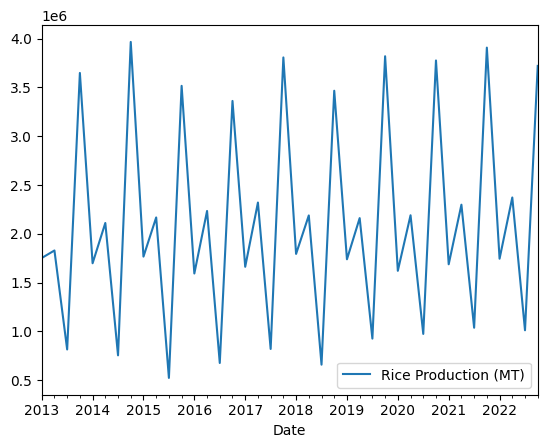

In [8]:
luzon_df.plot()

### Volume of Production for Irrigated & Rainfed Palay for All Four Regions

We want a stacked bar plot of Irrigated Palay and Rainfed Palay to also show the Total Palay Production while being able to compare Irrigated Palay & Rainfed Palay Production

In [9]:
# Get only Irrigated and Rainfed Palay Production Data
irrigated_and_rainfed = melted_df[melted_df['Ecosystem/Croptype'].isin(['Irrigated Palay', 'Rainfed Palay'])] 
irrigated_and_rainfed.head()

,Ecosystem/Croptype,Geolocation,Rice Production (MT)
Date,,,
2013-03-31,Irrigated Palay,..CORDILLERA ADMINISTRATIVE REGION (CAR),53933.0
2013-03-31,Irrigated Palay,..REGION I (ILOCOS REGION),304800.0
2013-03-31,Irrigated Palay,..REGION II (CAGAYAN VALLEY),636359.0
2013-03-31,Irrigated Palay,..REGION III (CENTRAL LUZON),664331.0
2013-03-31,Rainfed Palay,..CORDILLERA ADMINISTRATIVE REGION (CAR),2336.0


Since we are doing a totality for the four regions, we can get rid of 'Geolocation' Column for now. We also want the Croptype in their own columns

In [10]:
irrigated_and_rainfed.drop('Geolocation', axis=1, inplace=True) # Drop Geolocation column
irrigated_and_rainfed.head()

C:\Users\Potato\AppData\Local\Temp\ipykernel_6740\1320992437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  irrigated_and_rainfed.drop('Geolocation', axis=1, inplace=True) # Drop Geolocation column


,Ecosystem/Croptype,Rice Production (MT)
Date,,
2013-03-31,Irrigated Palay,53933.0
2013-03-31,Irrigated Palay,304800.0
2013-03-31,Irrigated Palay,636359.0
2013-03-31,Irrigated Palay,664331.0
2013-03-31,Rainfed Palay,2336.0


In [11]:
irrigated_and_rainfed = irrigated_and_rainfed.groupby(['Date', 'Ecosystem/Croptype']).sum()
irrigated_and_rainfed.reset_index(inplace=True)
irrigated_and_rainfed.head()

,Date,Ecosystem/Croptype,Rice Production (MT)
0,2013-03-31,Irrigated Palay,1659423.00
1,2013-03-31,Rainfed Palay,92060.00
2,2013-06-30,Irrigated Palay,1783092.43
3,2013-06-30,Rainfed Palay,45518.18
4,2013-09-30,Irrigated Palay,765307.00


In [12]:
irrigated_and_rainfed.to_csv('riceipynb_output.csv', index=False)

Using the saved CSV to plot

In [13]:
# Import the saved csv
new_df = pd.read_csv('riceipynb_output.csv')
# new_df.drop('Geolocation', axis=1, inplace=True)
new_df.head()


,Date,Ecosystem/Croptype,Rice Production (MT)
0,2013-03-31,Irrigated Palay,1659423.00
1,2013-03-31,Rainfed Palay,92060.00
2,2013-06-30,Irrigated Palay,1783092.43
3,2013-06-30,Rainfed Palay,45518.18
4,2013-09-30,Irrigated Palay,765307.00


In [14]:
new_df = new_df.pivot(index='Date', columns='Ecosystem/Croptype', values='Rice Production (MT)')
new_df.reset_index(inplace=True)
q = new_df[['Date', 'Irrigated Palay', 'Rainfed Palay']]
q.head()

Ecosystem/Croptype,Date,Irrigated Palay,Rainfed Palay
0,2013-03-31,1659423.00,92060.00
1,2013-06-30,1783092.43,45518.18
2,2013-09-30,765307.00,48397.72
3,2013-12-31,2775869.00,873228.00
4,2014-03-31,1596358.95,101220.00


In [15]:
q.to_csv('riceipynb_output1.csv', index=False)

In [16]:
new_df = pd.read_csv('riceipynb_output1.csv')
new_df.head()

,Date,Irrigated Palay,Rainfed Palay
0,2013-03-31,1659423.00,92060.00
1,2013-06-30,1783092.43,45518.18
2,2013-09-30,765307.00,48397.72
3,2013-12-31,2775869.00,873228.00
4,2014-03-31,1596358.95,101220.00


In [17]:
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df = new_df.set_index('Date')
new_df = new_df.resample('Q').sum()

In [18]:
new_df.head()

,Irrigated Palay,Rainfed Palay
Date,,
2013-03-31,1659423.00,92060.00
2013-06-30,1783092.43,45518.18
2013-09-30,765307.00,48397.72
2013-12-31,2775869.00,873228.00
2014-03-31,1596358.95,101220.00


<Axes: xlabel='Date'>

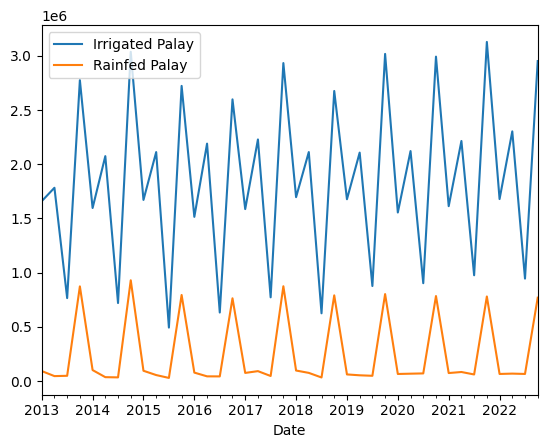

In [19]:
new_df.plot()

In [20]:
# Reset index
new_df = new_df.reset_index()

# Add column Quarter to dataframe
new_df['Quarter'] = pd.PeriodIndex(new_df.Date, freq='Q')

# Drop Date column
new_df.drop('Date', axis=1, inplace=True)

In [21]:
new_df.head()

,Irrigated Palay,Rainfed Palay,Quarter
0,1659423.00,92060.00,2013Q1
1,1783092.43,45518.18,2013Q2
2,765307.00,48397.72,2013Q3
3,2775869.00,873228.00,2013Q4
4,1596358.95,101220.00,2014Q1


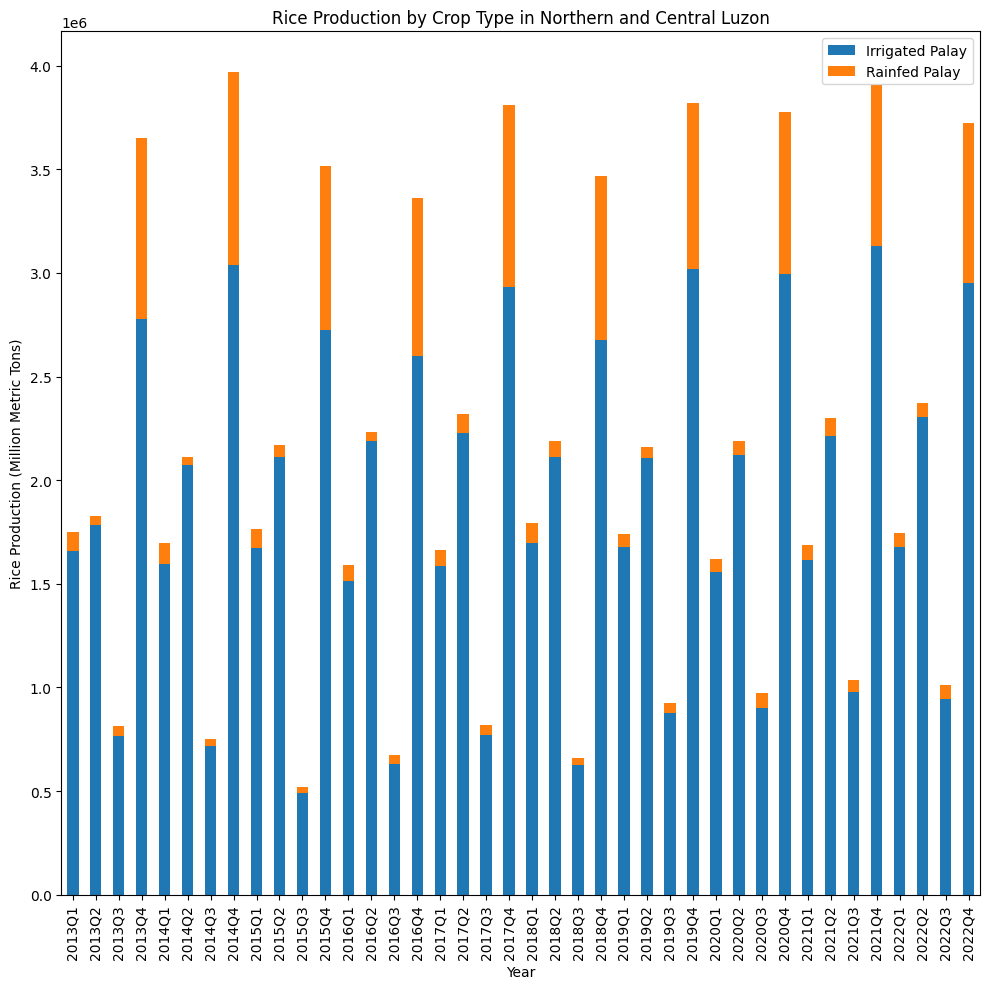

In [22]:
bar_plot = new_df.set_index('Quarter')
bar_plot = bar_plot.plot(kind='bar', stacked=True, figsize=(10, 10))
bar_plot.set_title('Rice Production by Crop Type in Northern and Central Luzon')
bar_plot.set_xlabel('Year')
bar_plot.set_ylabel('Rice Production (Million Metric Tons)')

plt.subplots_adjust(bottom=0.5) # Adjust bottom spacing to increase space between bars
# plt.xticks(rotation=45) # Label rotation
plt.tight_layout()
plt.show()